In [314]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Data cleaning

### Create separate columns for the rates of mental health conditions and suicide for each gender.

In [315]:
DATASET_FILENAME = "intermediate_suicide_2021.csv" # name of the csv file containing the dataset

In [316]:
suicide_data = pd.read_csv(DATASET_FILENAME)
suicide_data.head()

,location,sex,age,anxiety_percent,bipolar_percent,depress_percent,suicide_rate_per100k,country_code,year,gdp_usd
0,People's Republic of China,Male,15-49 years,0.030089,0.002371,0.025406,7.148372,CHN,2021.0,12617.505104
1,People's Republic of China,Female,15-49 years,0.049990,0.002573,0.041064,4.274235,CHN,2021.0,12617.505104
2,Democratic People's Republic of Korea,Male,15-49 years,0.031223,0.002446,0.023614,10.637906,PRK,2021.0,NaN
3,Democratic People's Republic of Korea,Female,15-49 years,0.052123,0.002546,0.040503,7.770534,PRK,2021.0,NaN
4,Socialist Republic of Viet Nam,Male,15-49 years,0.022690,0.004234,0.026537,11.649648,VNM,2021.0,3704.193559


In [317]:
pivoted = suicide_data.pivot_table(
    index=['location', 'age', 'country_code', 'gdp_usd'], # use these as rows in a MultiIndex
    columns='sex', # maks separate disorder and suicide columns by sex
    values=['anxiety_percent', 'bipolar_percent', 'depress_percent', 'suicide_rate_per100k'] # cols to aggregate
)

pivoted.head() # Results in a table with a MultiIndex for both the index and columns

anxiety_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.064493   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.086864   
Argentine Republic  15-49 years ARG          10738.017922        0.111099   
Australia           15-49 years AUS          60607.778861        0.109350   
Barbados            15-49 years BRB          18696.785895        0.089775   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.039367   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.049242   
Argentine Republic  15-49 years ARG          10738.017922  0.057252   
Australia           15-49 years AUS          60607.778861  0.068449   
Barbados            15-49 years BRB          18696.785895  0.051127   

                                                          bipolar_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.003532   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.013375   
Argentine Republic  15-49 years ARG          10738.017922        0.011635   
Australia           15-49 years AUS          60607.778861        0.016182   
Barbados            15-49 years BRB          18696.785895        0.013237   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.003448   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.011714   
Argentine Republic  15-49 years ARG          10738.017922  0.009242   
Australia           15-49 years AUS          60607.778861  0.015370   
Barbados            15-49 years BRB          18696.785895  0.011617   

                                                          depress_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.040142   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.057791   
Argentine Republic  15-49 years ARG          10738.017922        0.055580   
Australia           15-49 years AUS          60607.778861        0.087065   
Barbados            15-49 years BRB          18696.785895        0.060730   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.030680   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.030021   
Argentine Republic  15-49 years ARG          10738.017922  0.036287   
Australia           15-49 years AUS          60607.778861  0.059841   
Barbados            15-49 years BRB          18696.785895  0.035615   

                                                          suicide_rate_per100k  \
sex                                                                     Female   
location            age         country_code gdp_usd                             
American Samoa      15-49 years ASM          15236.160488             5.571612   
Antigua and Barbuda 15-49 years ATG          17340.379069             0.251559   
Argentine Republic  15-49 years ARG          10738.017922             4.953540   
Australi

In [318]:
pivoted = pivoted.reset_index() # Turn the MultiIndex in the rows into a single index
pivoted.head()

location          age country_code       gdp_usd  \
sex                                                                
0         American Samoa  15-49 years          ASM  15236.160488   
1    Antigua and Barbuda  15-49 years          ATG  17340.379069   
2     Argentine Republic  15-49 years          ARG  10738.017922   
3              Australia  15-49 years          AUS  60607.778861   
4               Barbados  15-49 years          BRB  18696.785895   

    anxiety_percent           bipolar_percent           depress_percent  \
sex          Female      Male          Female      Male          Female   
0          0.064493  0.039367        0.003532  0.003448        0.040142   
1          0.086864  0.049242        0.013375  0.011714        0.057791   
2          0.111099  0.057252        0.011635  0.009242        0.055580   
3          0.109350  0.068449        0.016182  0.015370        0.087065   
4          0.089775  0.051127        0.013237  0.011617        0.060730   

              suicide_rate_per100k             
sex      Male               Female       Male  
0    0.030680             5.571612  19.082456  
1    0.030021             0.251559   2.028625  
2    0.036287             4.953540  21.255442  
3    0.059841             7.524478  25.598084  
4    0.035615             1.165735   6.877231

In [319]:
# Flatten the MultiIndex columns into a single index
pivoted.columns = ['_'.join(col) for col in pivoted.columns.values]

In [320]:
pivoted.head()

,location_,age_,country_code_,gdp_usd_,anxiety_percent_Female,anxiety_percent_Male,bipolar_percent_Female,bipolar_percent_Male,depress_percent_Female,depress_percent_Male,suicide_rate_per100k_Female,suicide_rate_per100k_Male
0,American Samoa,15-49 years,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
1,Antigua and Barbuda,15-49 years,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
2,Argentine Republic,15-49 years,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
3,Australia,15-49 years,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
4,Barbados,15-49 years,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [321]:
# Clean up column names to be snake case and have no trailing underscores
pivoted.columns = [col.lower().strip("_") for col in pivoted.columns]
pivoted.head()

,location,age,country_code,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
0,American Samoa,15-49 years,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
1,Antigua and Barbuda,15-49 years,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
2,Argentine Republic,15-49 years,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
3,Australia,15-49 years,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
4,Barbados,15-49 years,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [322]:
# Set the index to a MultiIndex whose levels are the country name and country code

pivoted = pivoted.set_index(["location", "country_code"]) # Set the index to the country name
pivoted = pivoted.drop(columns=["age"]) # drop age column
pivoted.head()

,,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
location,country_code,,,,,,,,,
American Samoa,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
Antigua and Barbuda,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
Argentine Republic,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
Australia,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
Barbados,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [323]:
pivoted.to_csv("data_no_scaling.csv", index=True)

In [324]:
pivoted.isna().sum()

gdp_usd                        0
anxiety_percent_female         0
anxiety_percent_male           0
bipolar_percent_female         0
bipolar_percent_male           0
depress_percent_female         0
depress_percent_male           0
suicide_rate_per100k_female    0
suicide_rate_per100k_male      0
dtype: int64

## Split by gender

In [325]:
pivoted.head()

,,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
location,country_code,,,,,,,,,
American Samoa,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
Antigua and Barbuda,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
Argentine Republic,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
Australia,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
Barbados,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [326]:
male_cols = [col for col in pivoted.columns if not col.endswith("_female")] # All the columns we will have in the dataset for men (GDP and prevalences for men)
female_cols = [col for col in pivoted.columns if not col.endswith("_male")] # All the columns we will have in the dataset for women (GDP and prevalences for women)

male_df = pivoted[male_cols]
female_df = pivoted[female_cols]

In [327]:
male_df.head()

,,gdp_usd,anxiety_percent_male,bipolar_percent_male,depress_percent_male,suicide_rate_per100k_male
location,country_code,,,,,
American Samoa,ASM,15236.160488,0.039367,0.003448,0.030680,19.082456
Antigua and Barbuda,ATG,17340.379069,0.049242,0.011714,0.030021,2.028625
Argentine Republic,ARG,10738.017922,0.057252,0.009242,0.036287,21.255442
Australia,AUS,60607.778861,0.068449,0.015370,0.059841,25.598084
Barbados,BRB,18696.785895,0.051127,0.011617,0.035615,6.877231


In [328]:
female_df.head()

,,gdp_usd,anxiety_percent_female,bipolar_percent_female,depress_percent_female,suicide_rate_per100k_female
location,country_code,,,,,
American Samoa,ASM,15236.160488,0.064493,0.003532,0.040142,5.571612
Antigua and Barbuda,ATG,17340.379069,0.086864,0.013375,0.057791,0.251559
Argentine Republic,ARG,10738.017922,0.111099,0.011635,0.055580,4.953540
Australia,AUS,60607.778861,0.109350,0.016182,0.087065,7.524478
Barbados,BRB,18696.785895,0.089775,0.013237,0.060730,1.165735


There is no missing data.

## Helper functions

In [329]:
def plot_heatmap(df: pd.DataFrame, figsize: tuple[int] = (10,8), title: str = "Correlation Matrix for Suicide Data"):
    """
    Plots the heatmap of the correlation matrix of a dataset.
    Parameters
        - df: the dataframe to plot
        - figsize: a tuple of integers for the figure size
        - title: title of the plot
    """
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(), annot=True, cmap="viridis")
    plt.title(title, fontsize=20)
    plt.show()

In [330]:
def make_pairplot(df: pd.DataFrame, figsize: tuple[int] = (12,12), title: str = "Pairplot for Suicide Data"):
    """ 
    Make a pairplot of a dataset 
    Params:
        - df: the dataframe to plot
        - figsize: a tuple of integers for the figure size
        - title: title of the plot
    """
    grid = sns.PairGrid(df, corner=True)
    grid.map_lower(sns.scatterplot, alpha=0.6)
    grid.map_diag(sns.histplot)
    grid.figure.set_size_inches(figsize)
    grid.figure.suptitle(title)

## EDA

### EDA for both genders together

Make a correlation matrix to see the strength of the linear relationships between features:

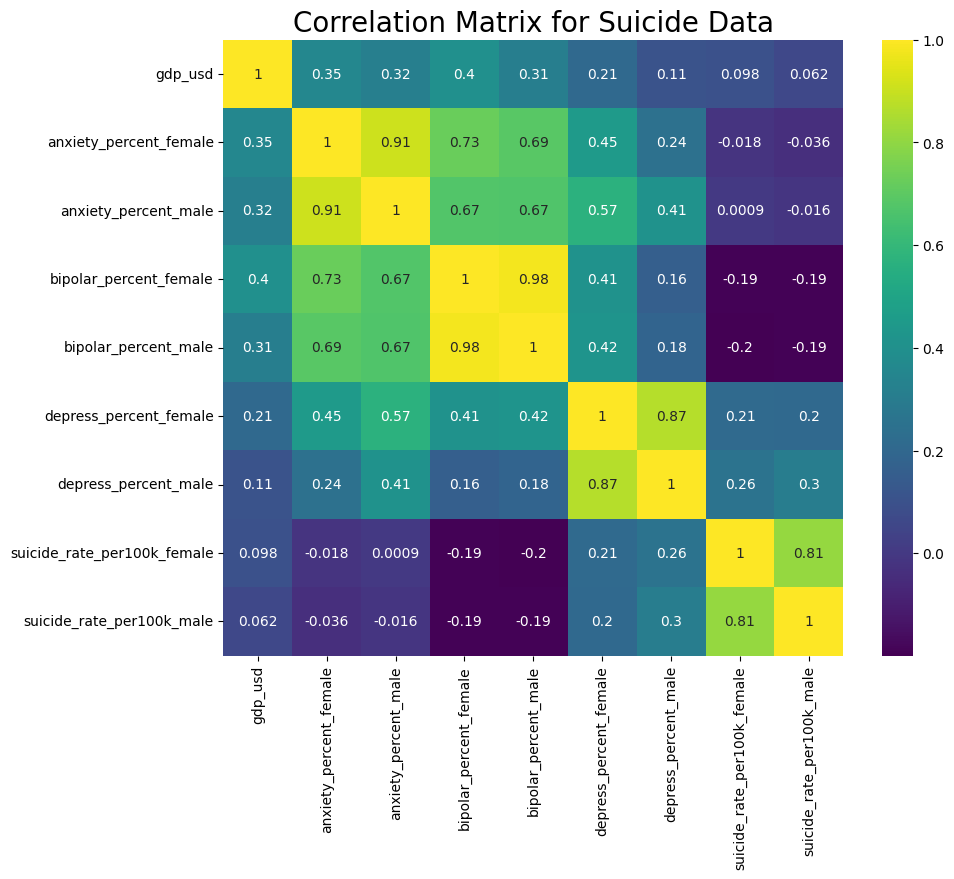

In [331]:
plot_heatmap(pivoted)

Since each data point is a country, the heatmap represents worldwide trends.

From the heatmap, we can see that the rates of bipolar disorder for men and for women have a very strong positive linear relationship, with a correlation coefficient of 0.98. So, as the worldwide number of men with bipolar disorder increases, the worldwide number of women with bipolar disorder does too. The rates of anxiety for men and women also have a strong positive correlation, with a coefficient of 0.91. 

The rates of depression for men and women have a strong positive correlation, and so do the suicide rates for men and women. So, worldwide, if more men are depressed, more women are depressed too. If more men commit suicide, more women commit suicide. 

Anxiety and bipolar disorder, in both men and women, all have a fairly strong positive relationship with each other. As the percentage of men and women (respectively) with bipolar disorder increases, the percentage of men and women with anxiety increases. In particular, there is a strong correlation (0.73) between the rate of anxiety for women and the rate of bipolar disorder for women. So, worldwide, as the number of women with anxiety increases, so does the number of women with bipolar disorder. 

There is a moderately strong positive correlation (0.57) between the anxiety rates for men and the depression rates for women.

GDP has very little correlation with depression and suicide rates. GDP has a fairly weak positive correlation with anxiety and bipolar disorder rates (0.31 to 0.4). So, countries with a higher GDP have higher rates of anxiety and bipolar disorder, but the relationship is weak. 

Now let's make a pairplot to visualize the relationships between the variables:

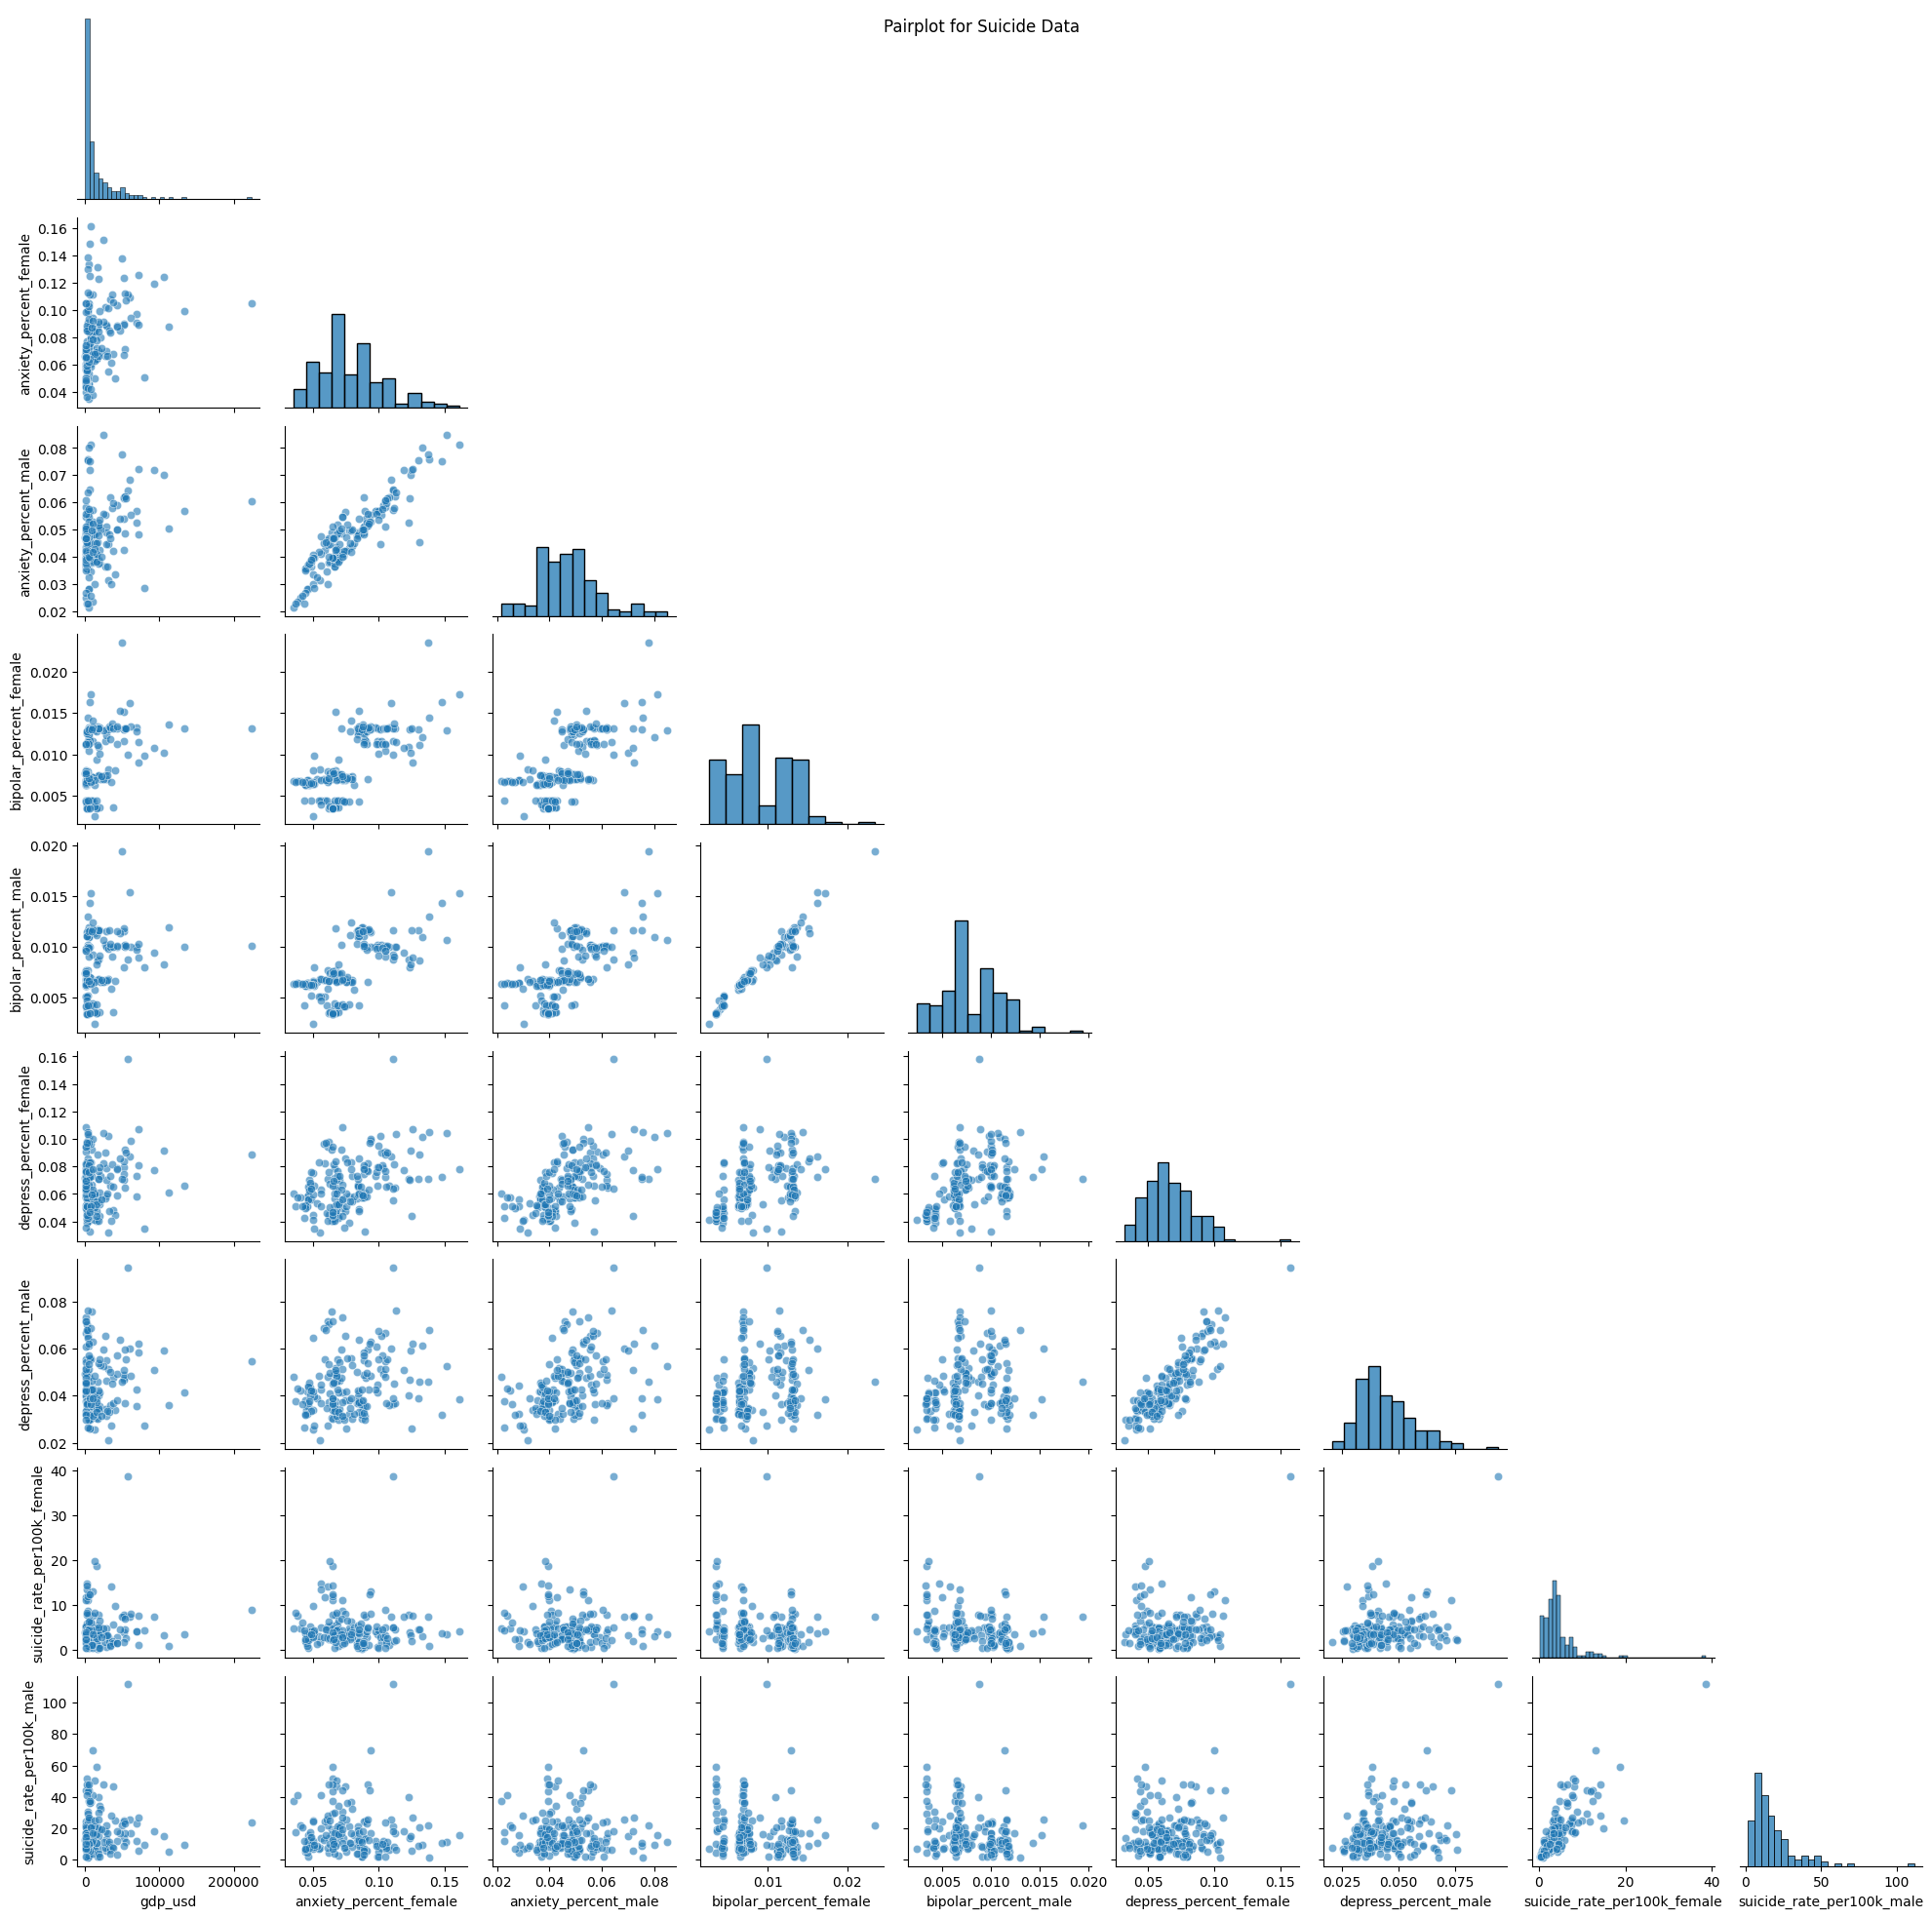

In [332]:
make_pairplot(pivoted, figsize=(20, 20))

The pairplot confirms the strong linear relationships we found between the male and female anxiety rates, bipolar disorder rates, depression rates, and suicide rates. We also see fairly strong linear relationships between bipolar disorder for both genders and anxiety rates for both genders. We see a moderately strong linear relationship between depression rates for women and anxiety rates for men. 

However, there appear to be nonlinear relationships too, and we are using linear regression to predict male and female suicide rates, respectively. Male suicide rate and female suicide rate seem to have nonlinear relationship with all the variables except for each other.

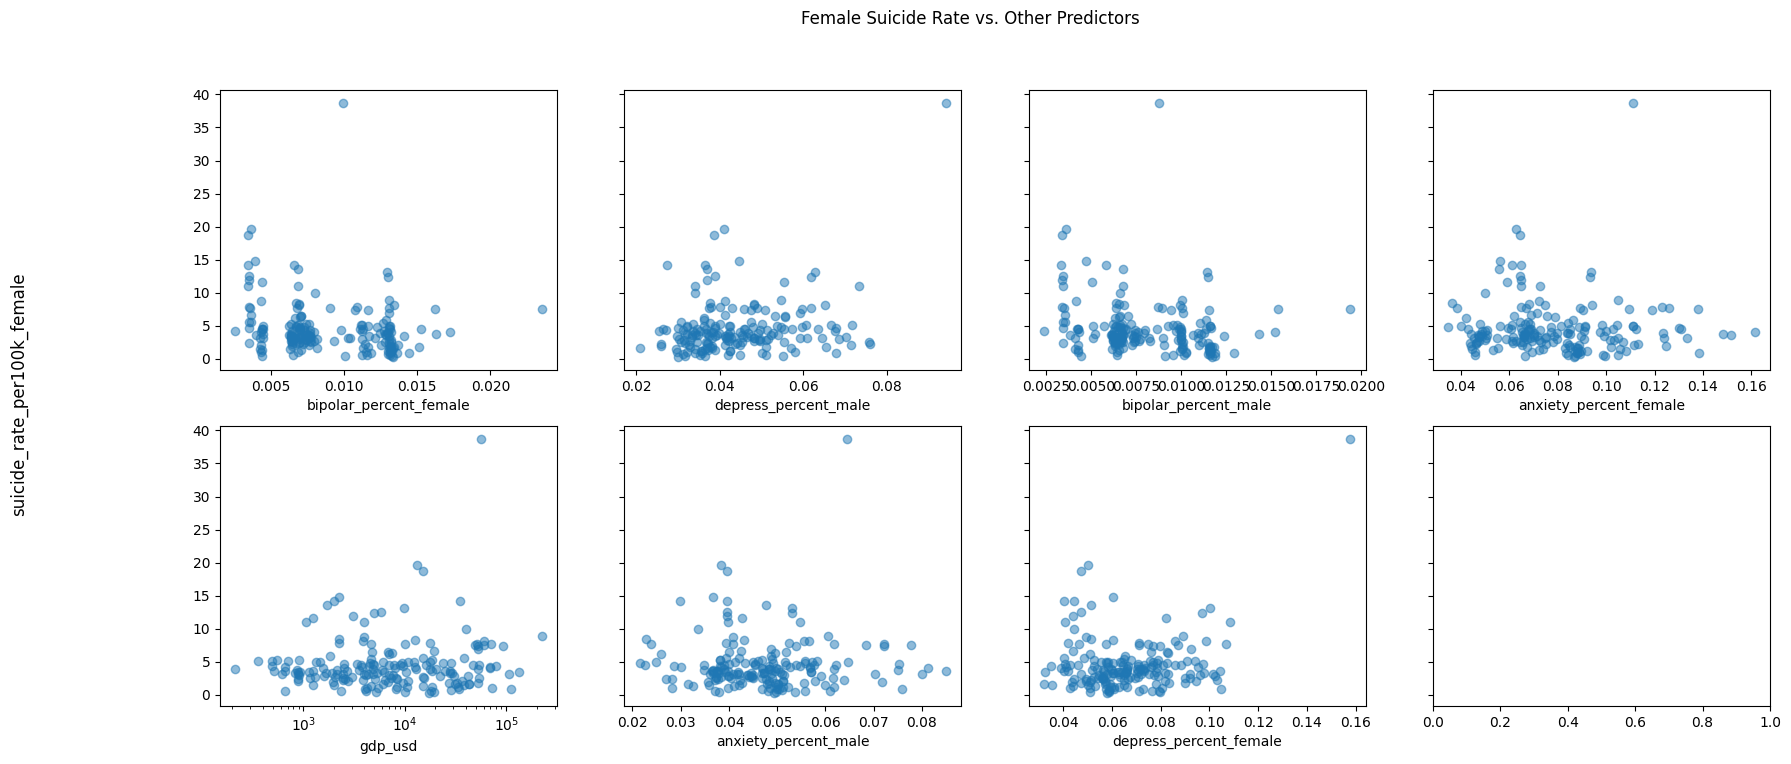

In [333]:
# Make individual plots of the response variables vs. the other variables

fig, axs = plt.subplots(nrows=2, ncols=4, sharey=True) 
fig.set_size_inches(20, 8)
fig.supylabel("suicide_rate_per100k_female")
fig.suptitle("Female Suicide Rate vs. Other Predictors")

# all the predictors in the dataset
predictor_cols = list(set(pivoted.columns) - set(["suicide_rate_per100k_male", "suicide_rate_per100k_female"]))

# for each predictor and its numbered index
for i, predictor in enumerate(predictor_cols[:4]):
    axs[0,i].scatter(pivoted[predictor], pivoted["suicide_rate_per100k_female"], alpha=0.5)
    axs[0,i].set_xlabel(predictor)

for i, predictor in enumerate(predictor_cols[4:]):
    axs[1,i].scatter(pivoted[predictor], pivoted["suicide_rate_per100k_female"], alpha=0.5)
    axs[1,i].set_xlabel(predictor)

    if predictor == "gdp_usd":
        axs[1, i].set_xscale("log")

### EDA for each gender separately

#### Male suicide rates

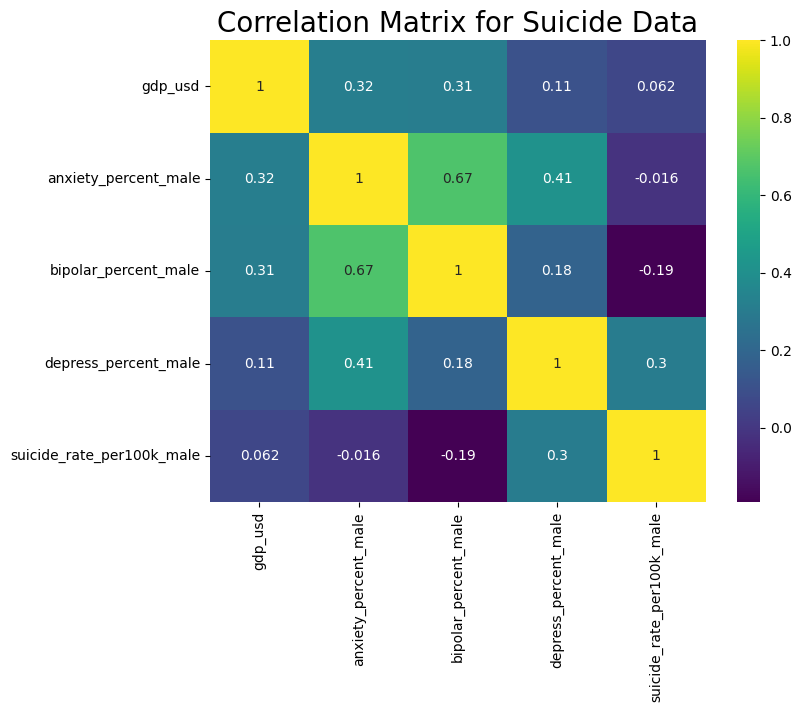

In [334]:
plot_heatmap(male_df, figsize=(8,6))

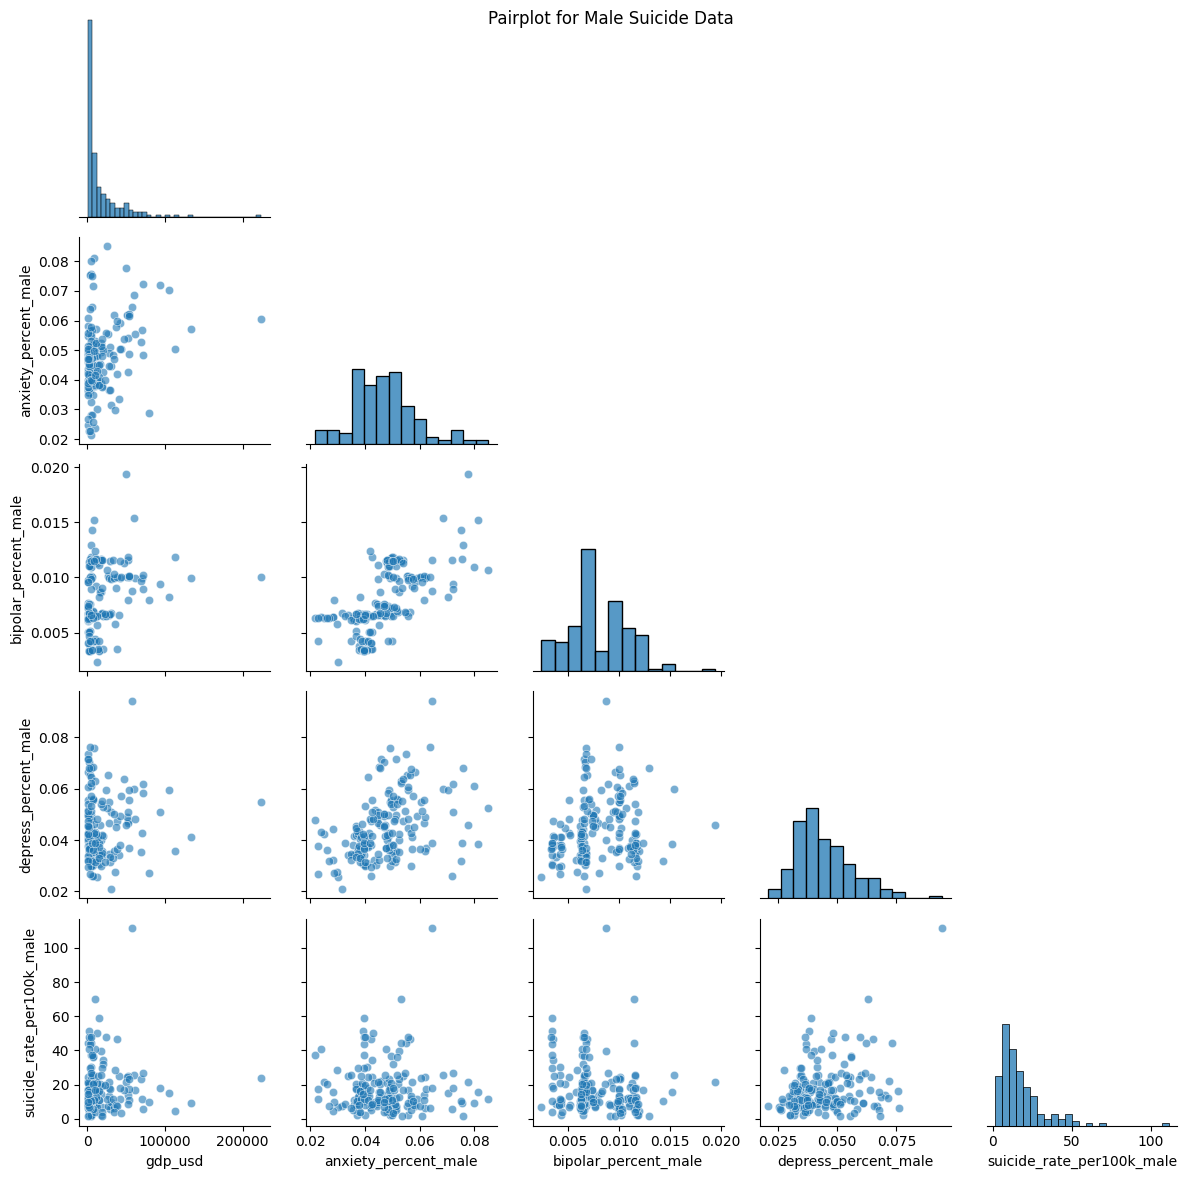

In [335]:
make_pairplot(male_df, title = "Pairplot for Male Suicide Data")

#### Female suicide rates

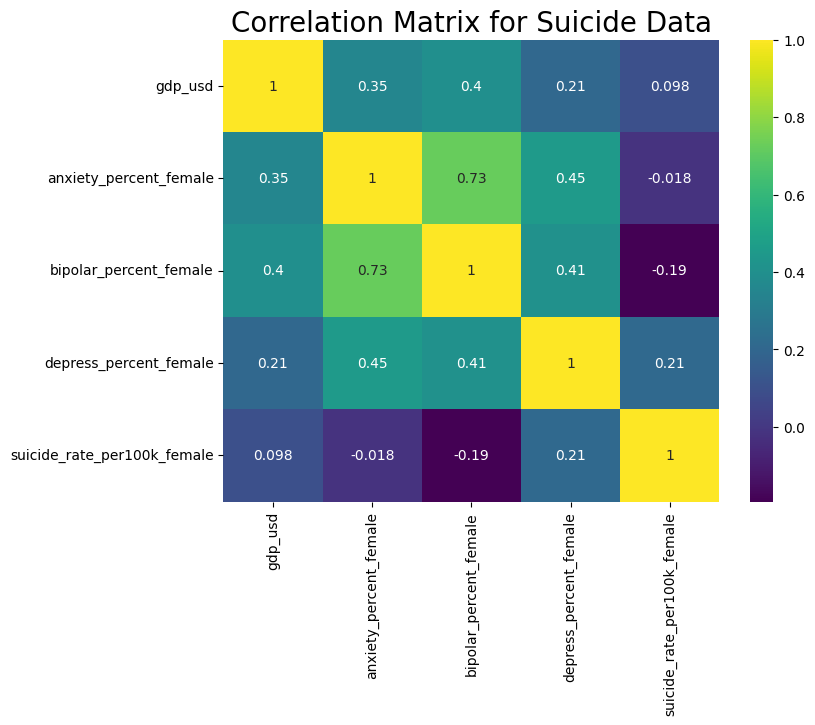

In [336]:
plot_heatmap(female_df, figsize=(8,6))

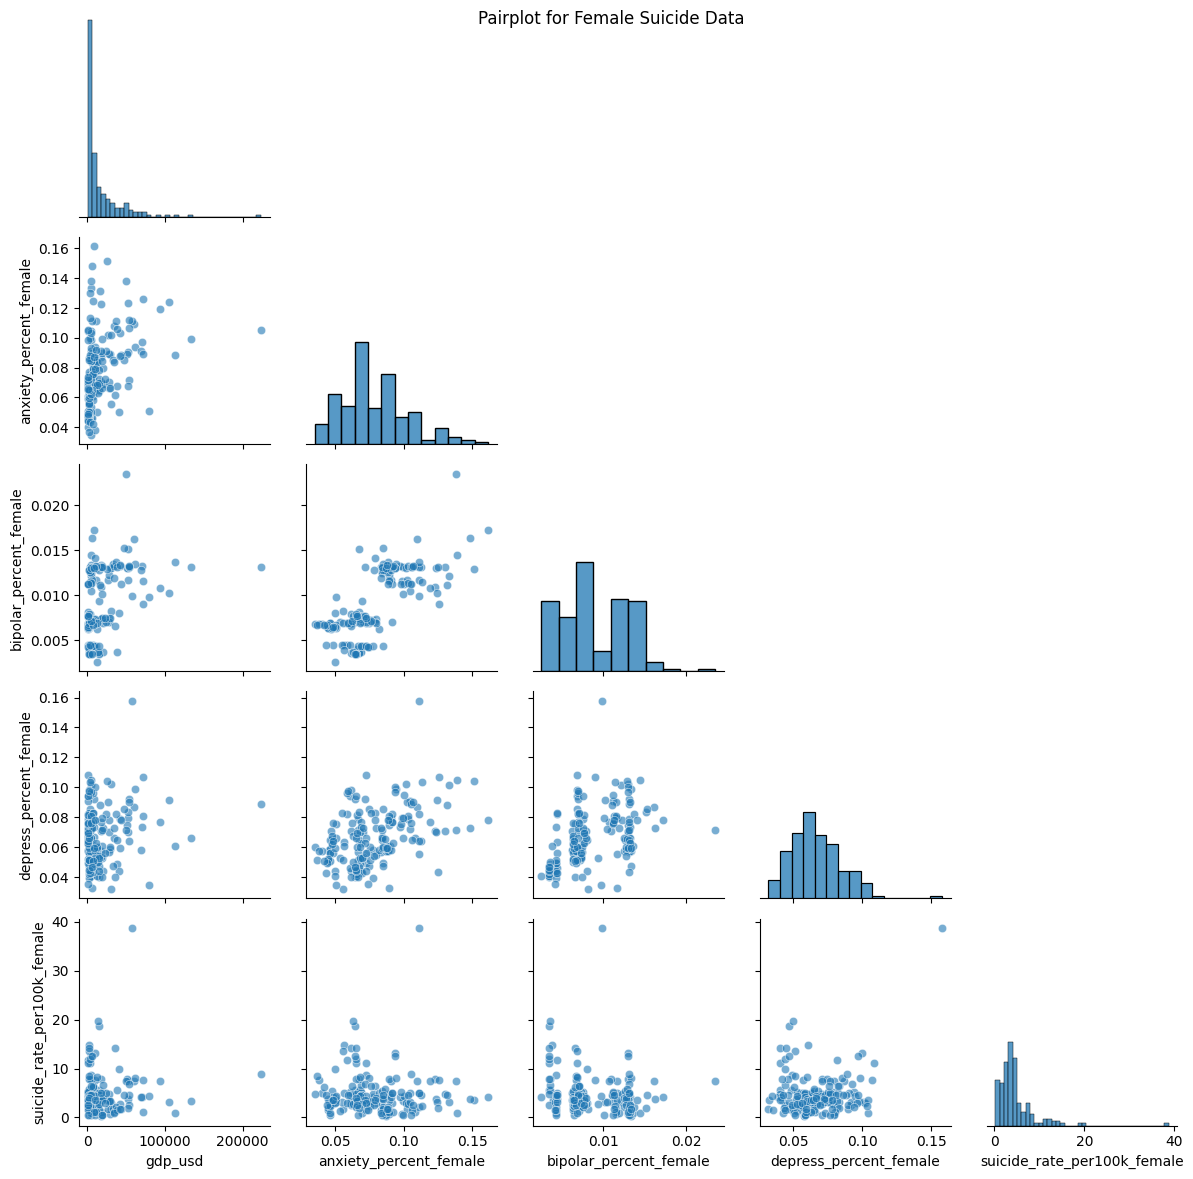

In [337]:
make_pairplot(female_df, title = "Pairplot for Female Suicide Data")

## Square root or square transformation

### Female data

In [338]:
import numpy as np

female_df_new = female_df.copy() # transformed data

# apply nonlinear transformations
female_df_new["anxiety_percent_female"] = np.sqrt(female_df_new["anxiety_percent_female"])
female_df_new["bipolar_percent_female"] = (female_df_new["bipolar_percent_female"])**2
female_df_new["depress_percent_female"] = np.sqrt(female_df_new["depress_percent_female"])
female_df_new["gdp_usd"] = np.log(female_df_new["gdp_usd"])

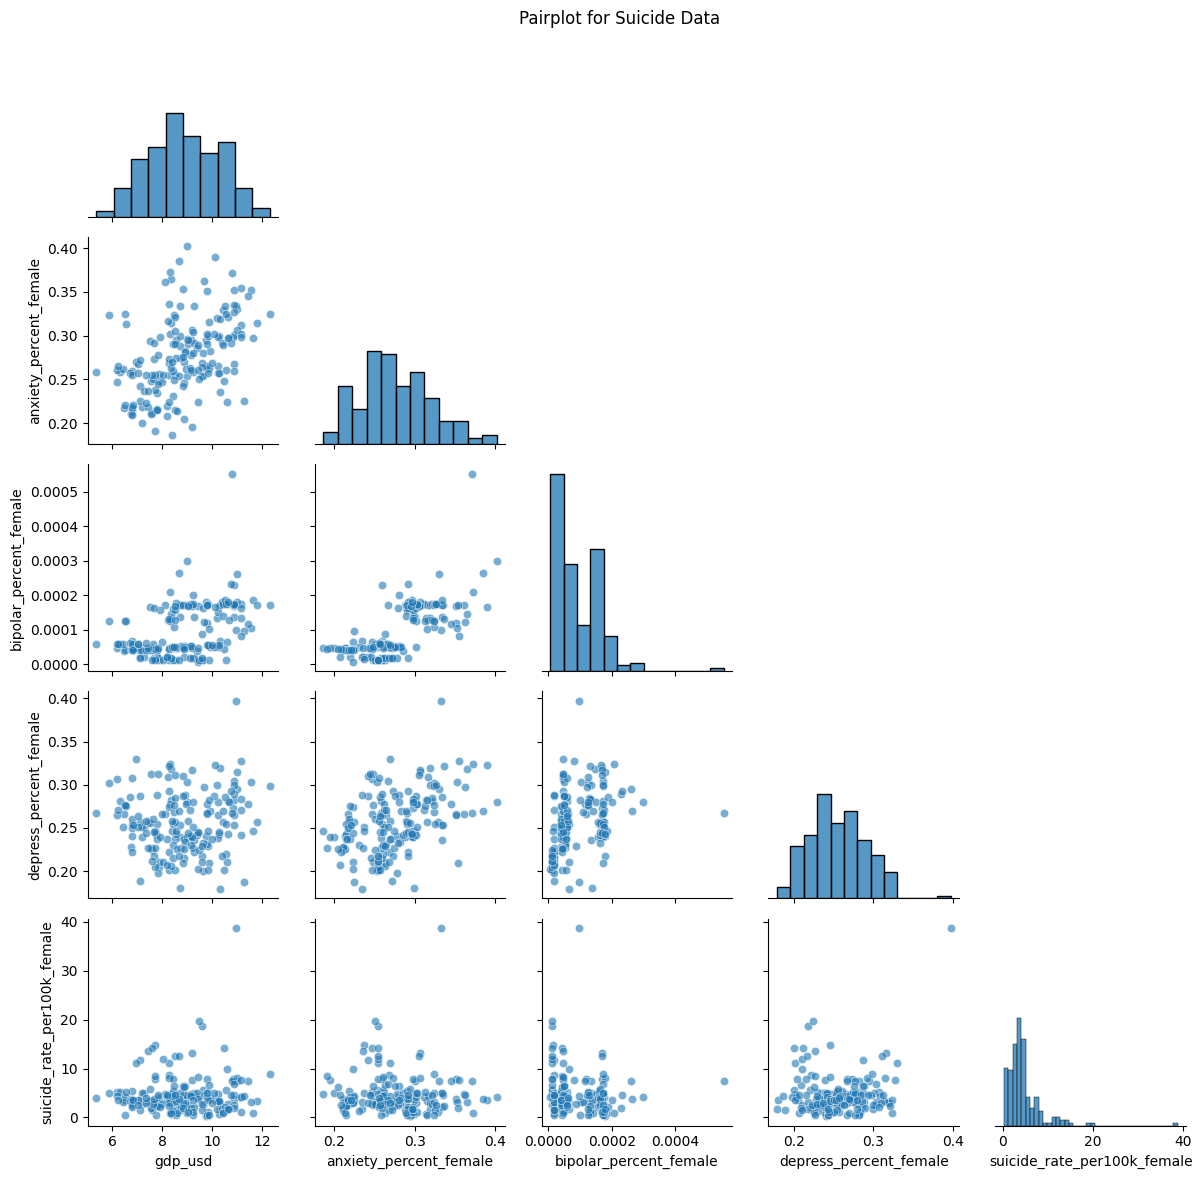

In [339]:
make_pairplot(female_df_new)

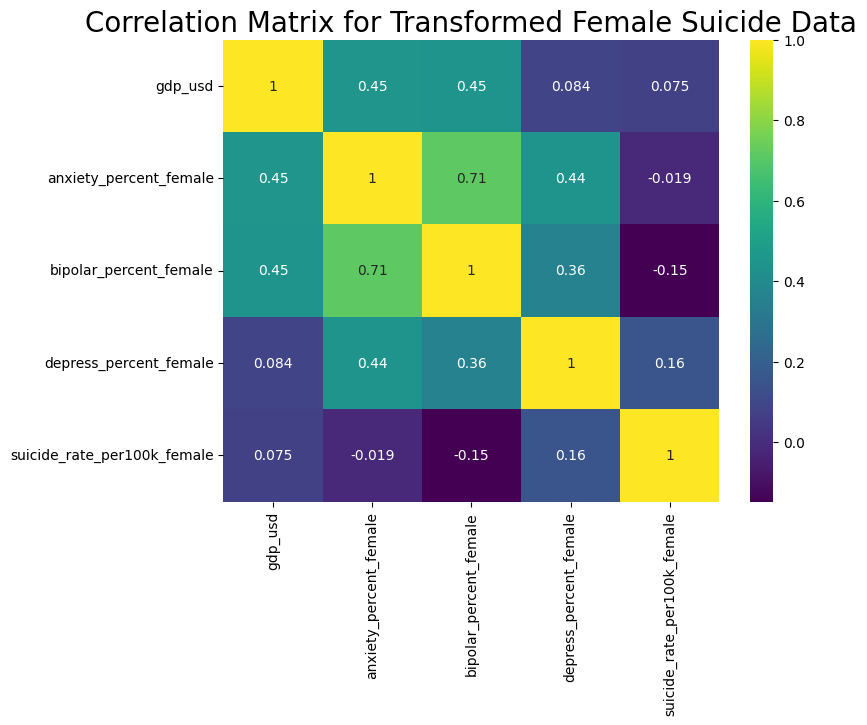

In [340]:
plot_heatmap(female_df_new, figsize=(8,6), title="Correlation Matrix for Transformed Female Suicide Data")

### Male data

In [341]:
male_df_new = male_df.copy() # transformed data

# apply nonlinear transformations
male_df_new["anxiety_percent_male"] = np.sqrt(male_df_new["anxiety_percent_male"])
male_df_new["bipolar_percent_male"] = (male_df_new["bipolar_percent_male"])**2
male_df_new["depress_percent_male"] = np.sqrt(male_df_new["depress_percent_male"])
male_df_new["gdp_usd"] = np.log(male_df_new["gdp_usd"])

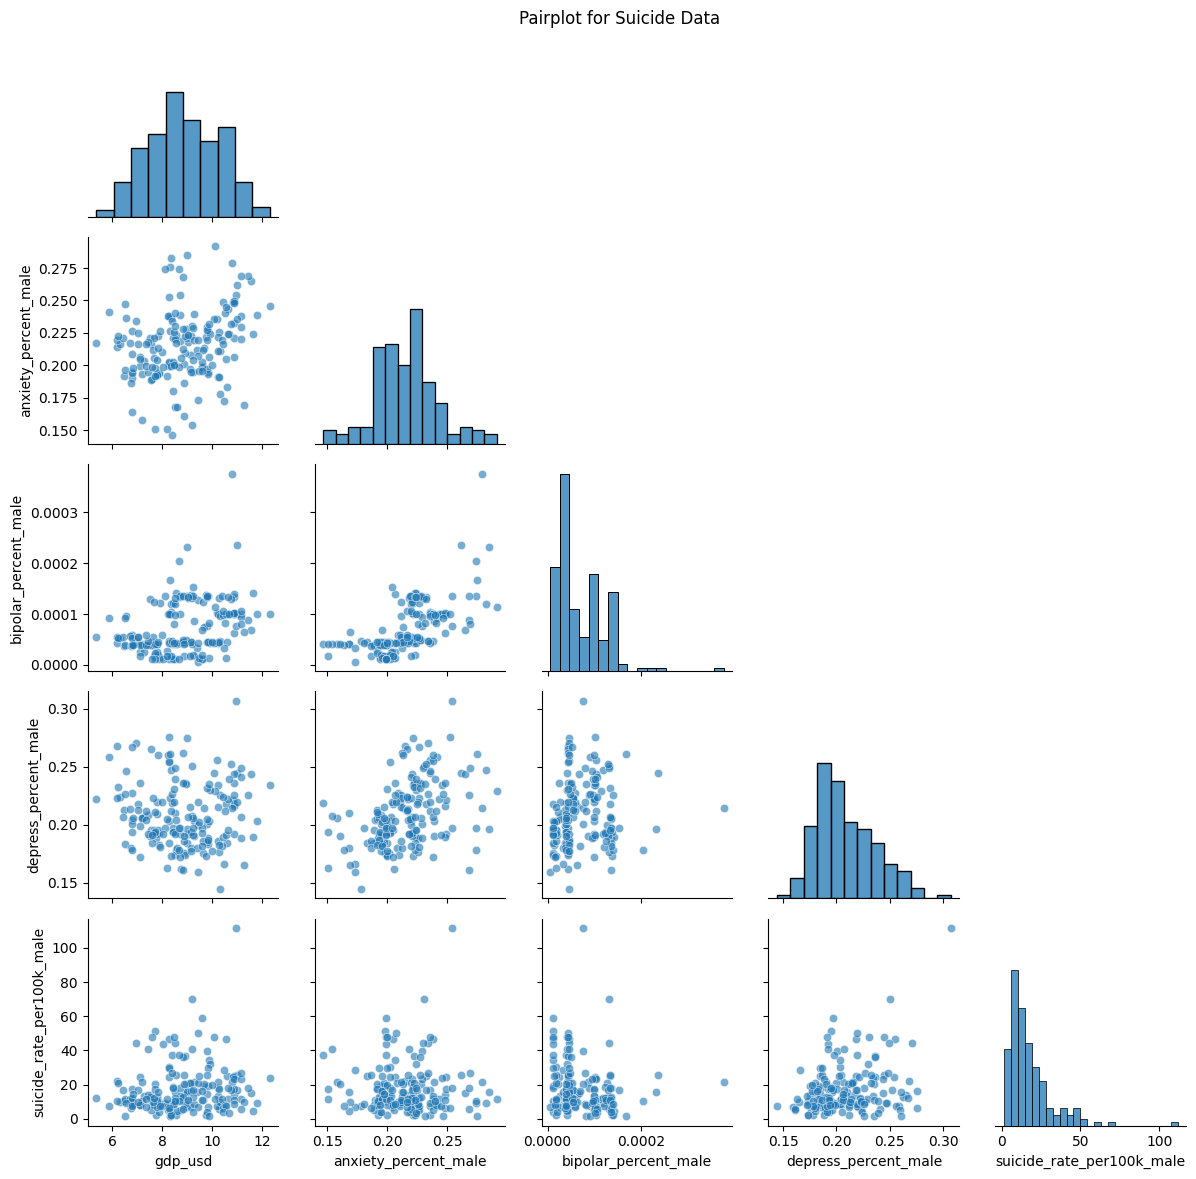

In [342]:
make_pairplot(male_df_new)

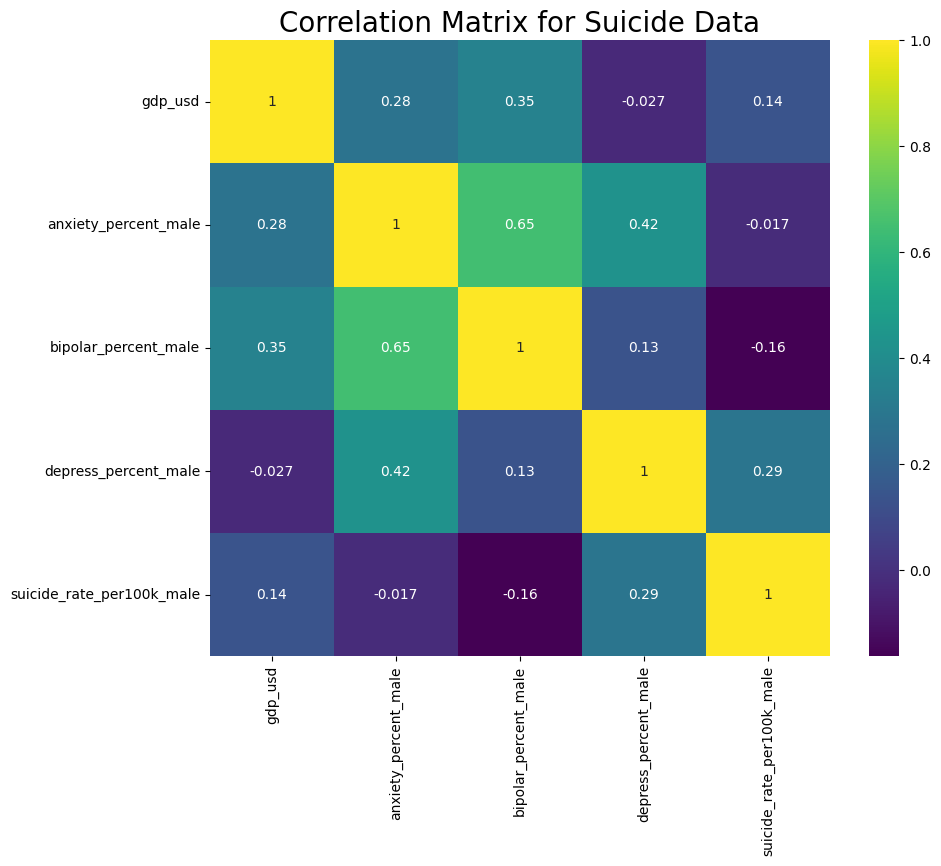

In [343]:
plot_heatmap(male_df_new)

## Log-transformation

In [344]:
pivoted.head()

,,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
location,country_code,,,,,,,,,
American Samoa,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
Antigua and Barbuda,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
Argentine Republic,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
Australia,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
Barbados,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [345]:
import numpy as np

pivoted_log_predictors = pivoted.copy() # log-transformed data

# Log-transform the predictors
for col in pivoted_log_predictors.columns:
    if col not in ["suicide_rate_per100k_female", "suicide_rate_per100k_male"]:
        pivoted_log_predictors[col] = np.log(pivoted_log_predictors[col])

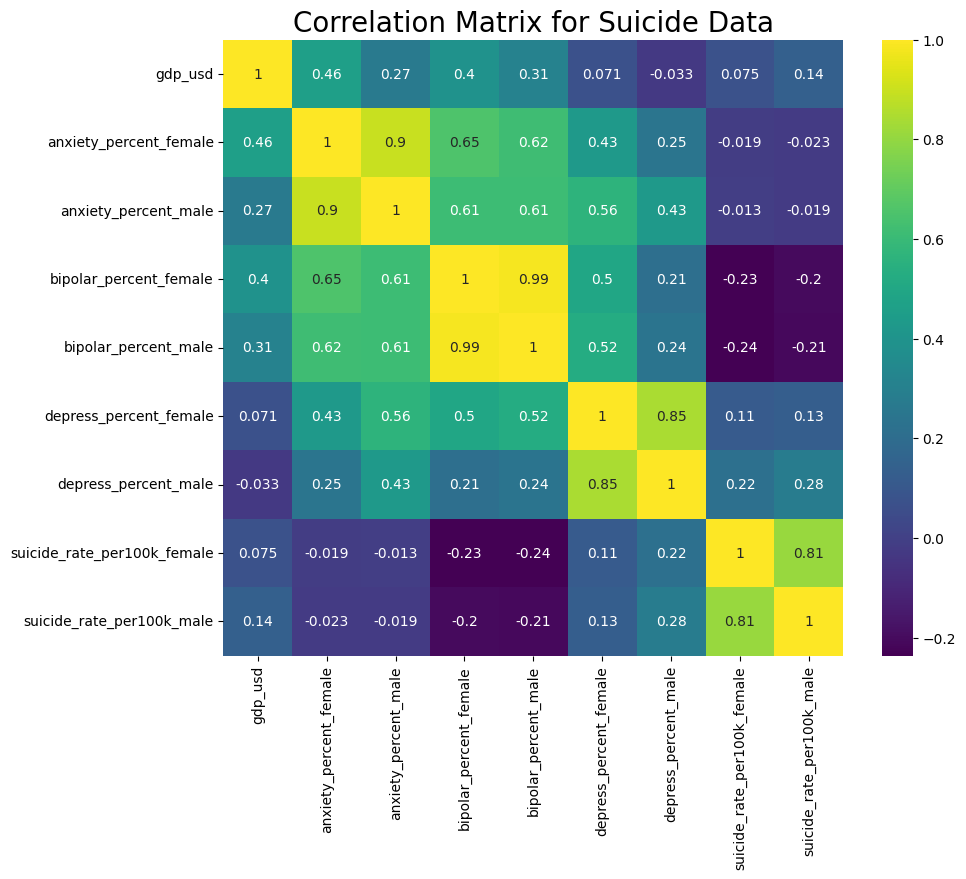

In [346]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pivoted_log_predictors.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix for Suicide Data", fontsize=20)
plt.show()

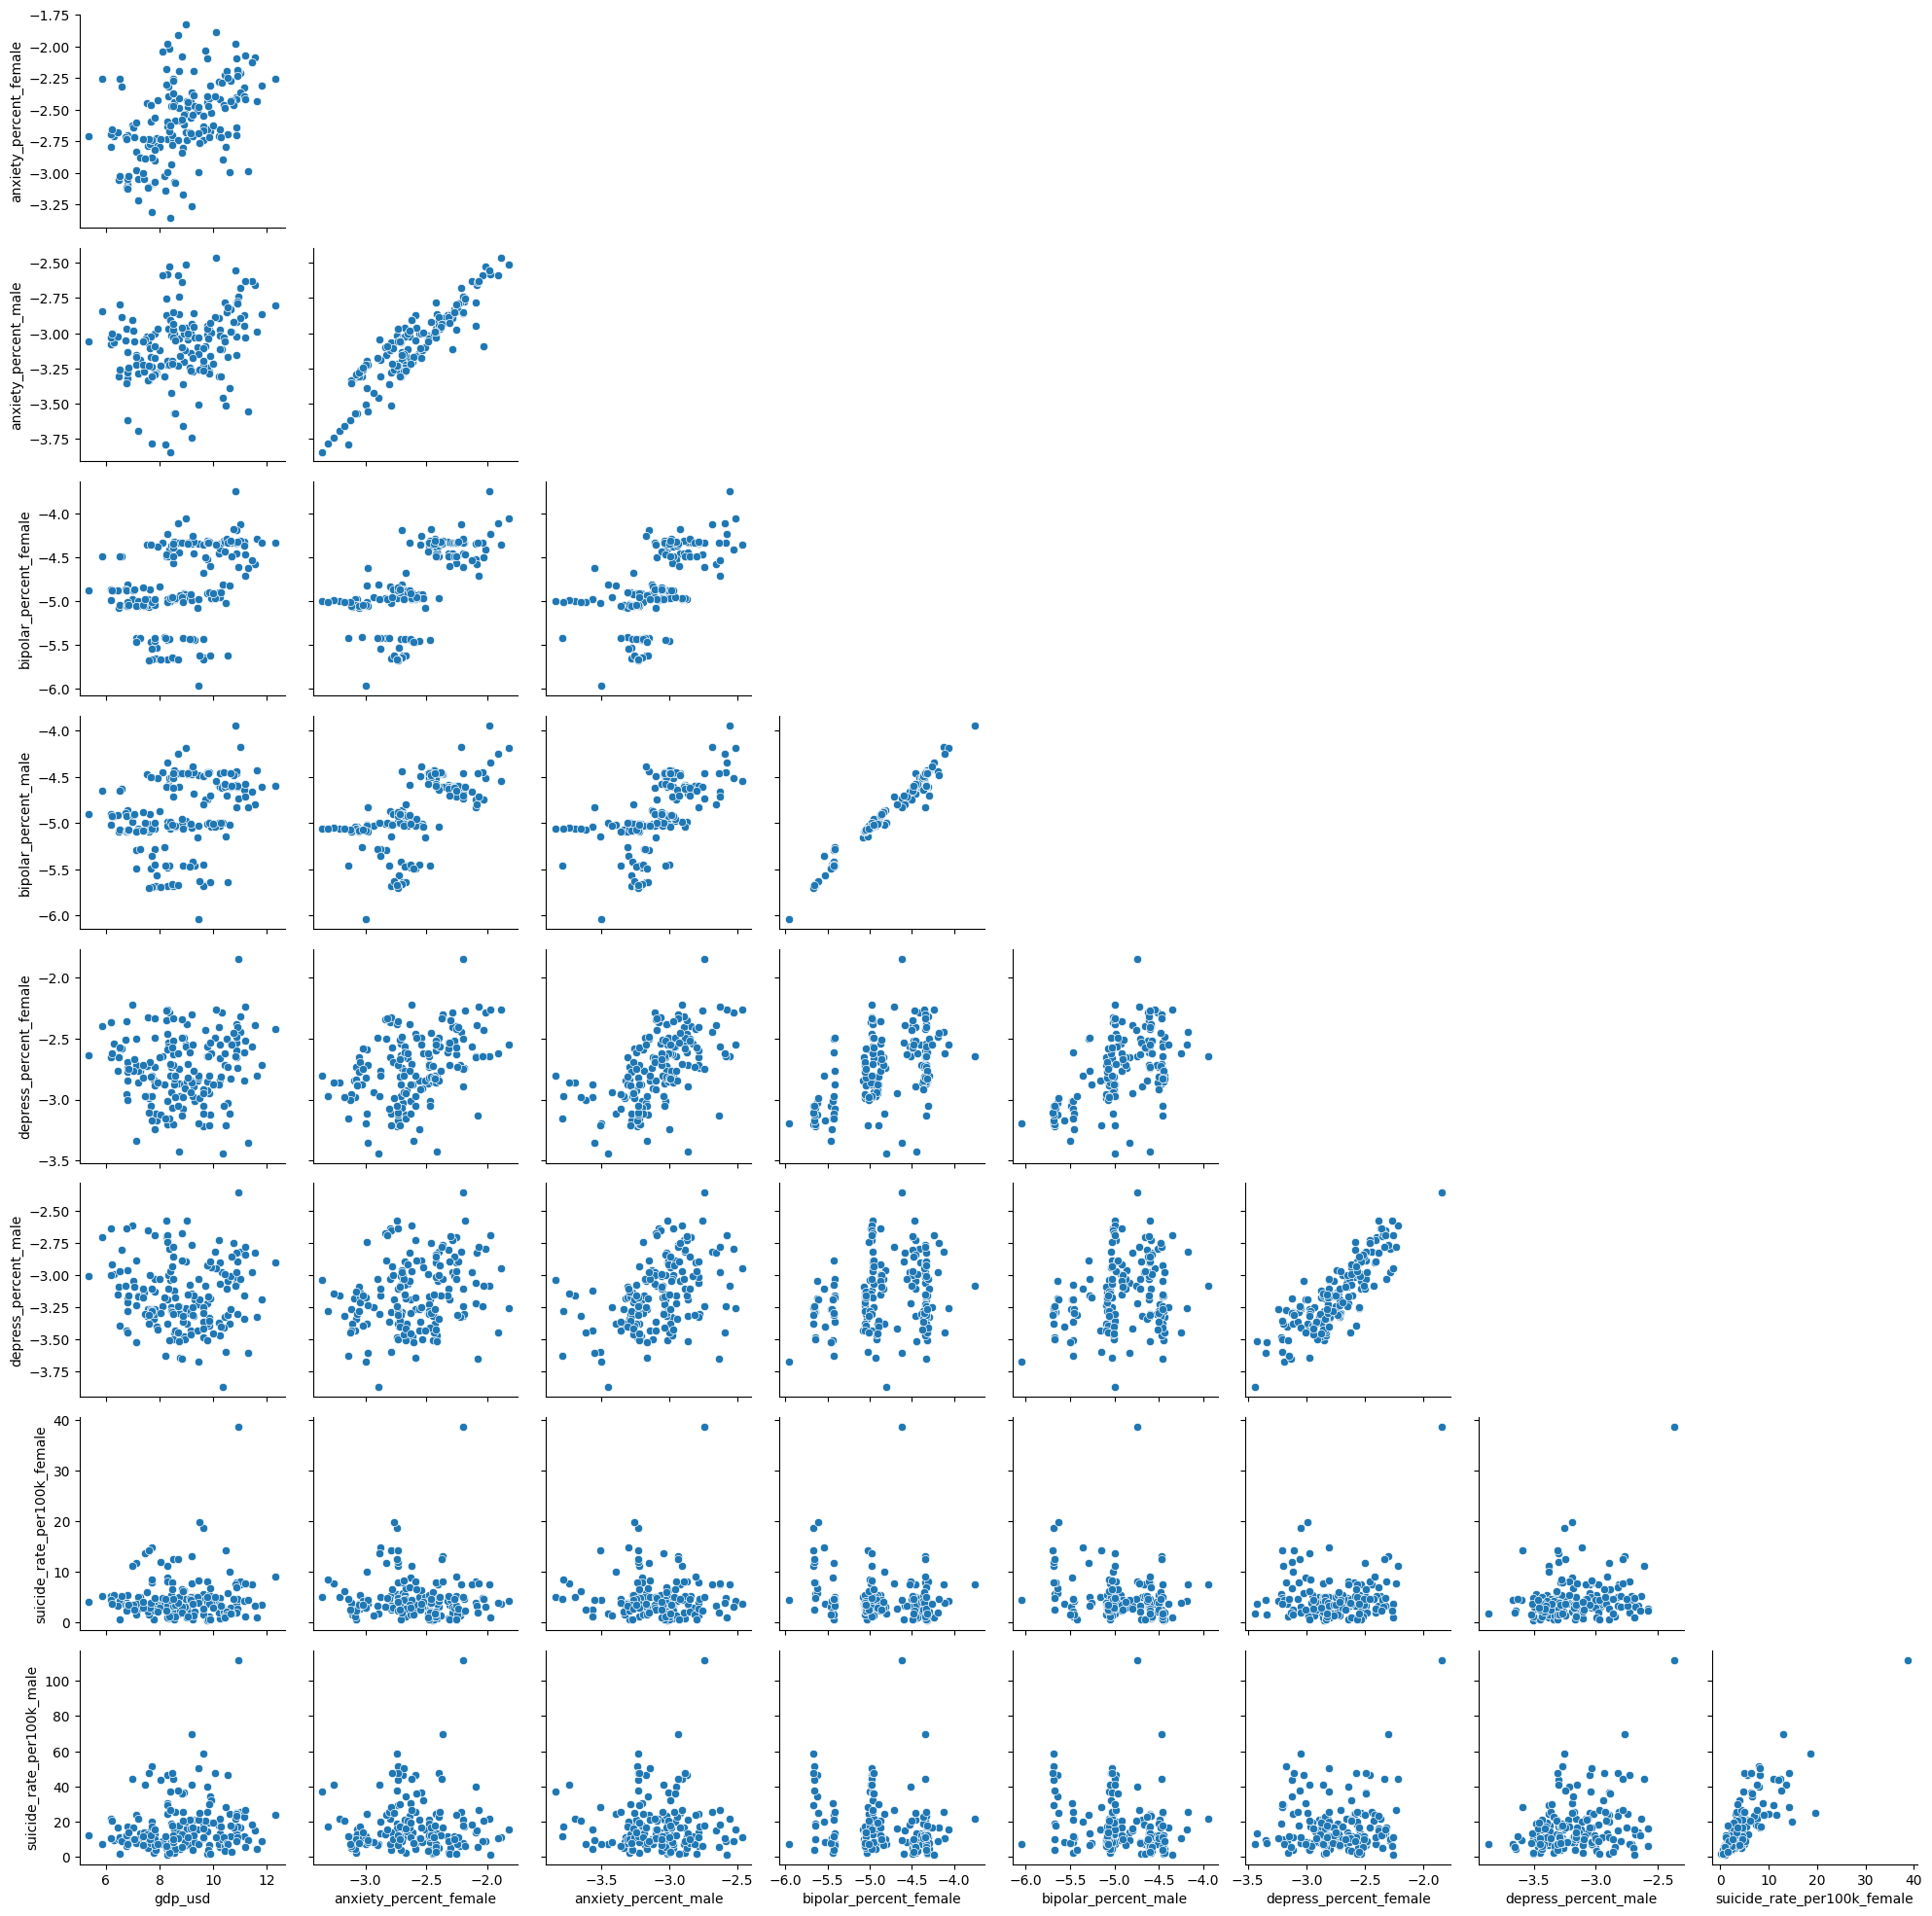

In [347]:
# Make a pairplot only below the diagonal of the grid
grid = sns.PairGrid(pivoted_log_predictors, corner=True)
grid.map_lower(sns.scatterplot)

# Don't plot anything on the diagonals of the pairplot
# Source for this code: https://stackoverflow.com/questions/63712608/how-to-remove-diagonal-plot-from-pairplot
for i in range(pivoted.shape[1]):
    grid.axes[i, i].set_visible(False)

In [348]:
pivoted_log_predictors.to_csv("data_log_transformed_predictors.csv")

In [349]:
# Log-transform the response, but not the predictors
pivoted_log_response = pivoted.copy()

pivoted_log_response["suicide_rate_per100k_female"] = np.log(pivoted_log_response["suicide_rate_per100k_female"])
pivoted_log_response["suicide_rate_per100k_male"] = np.log(pivoted_log_response["suicide_rate_per100k_male"])

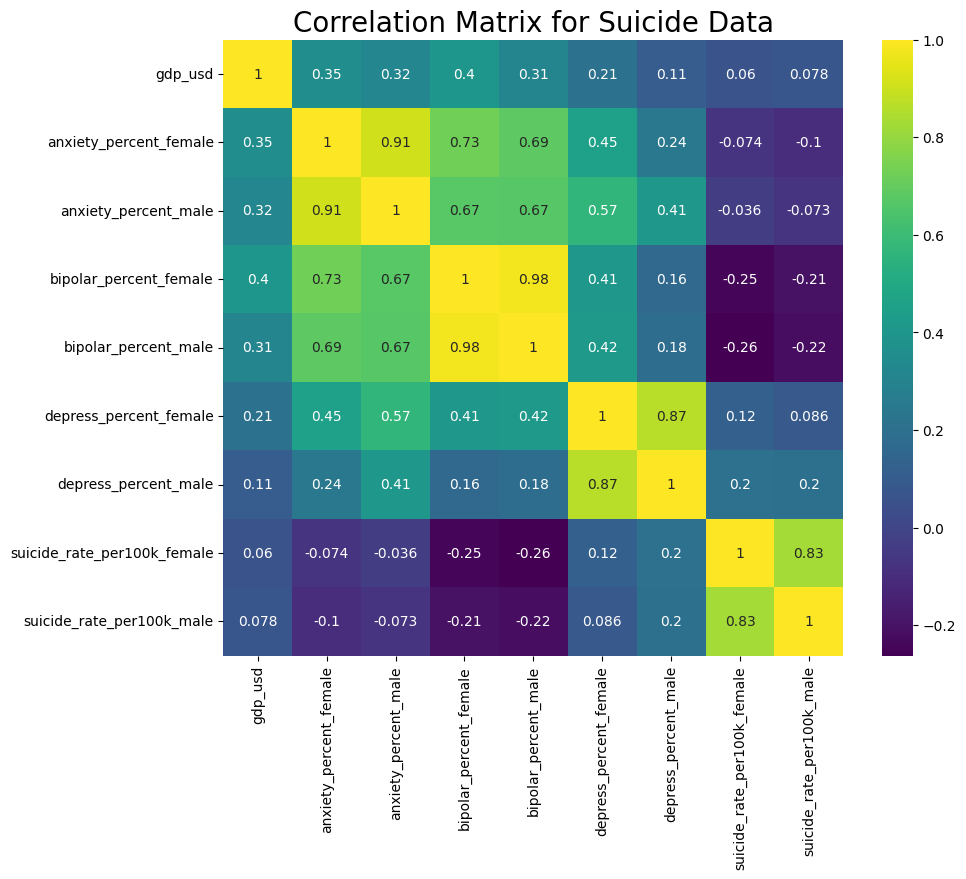

In [350]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pivoted_log_response.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix for Suicide Data", fontsize=20)
plt.show()

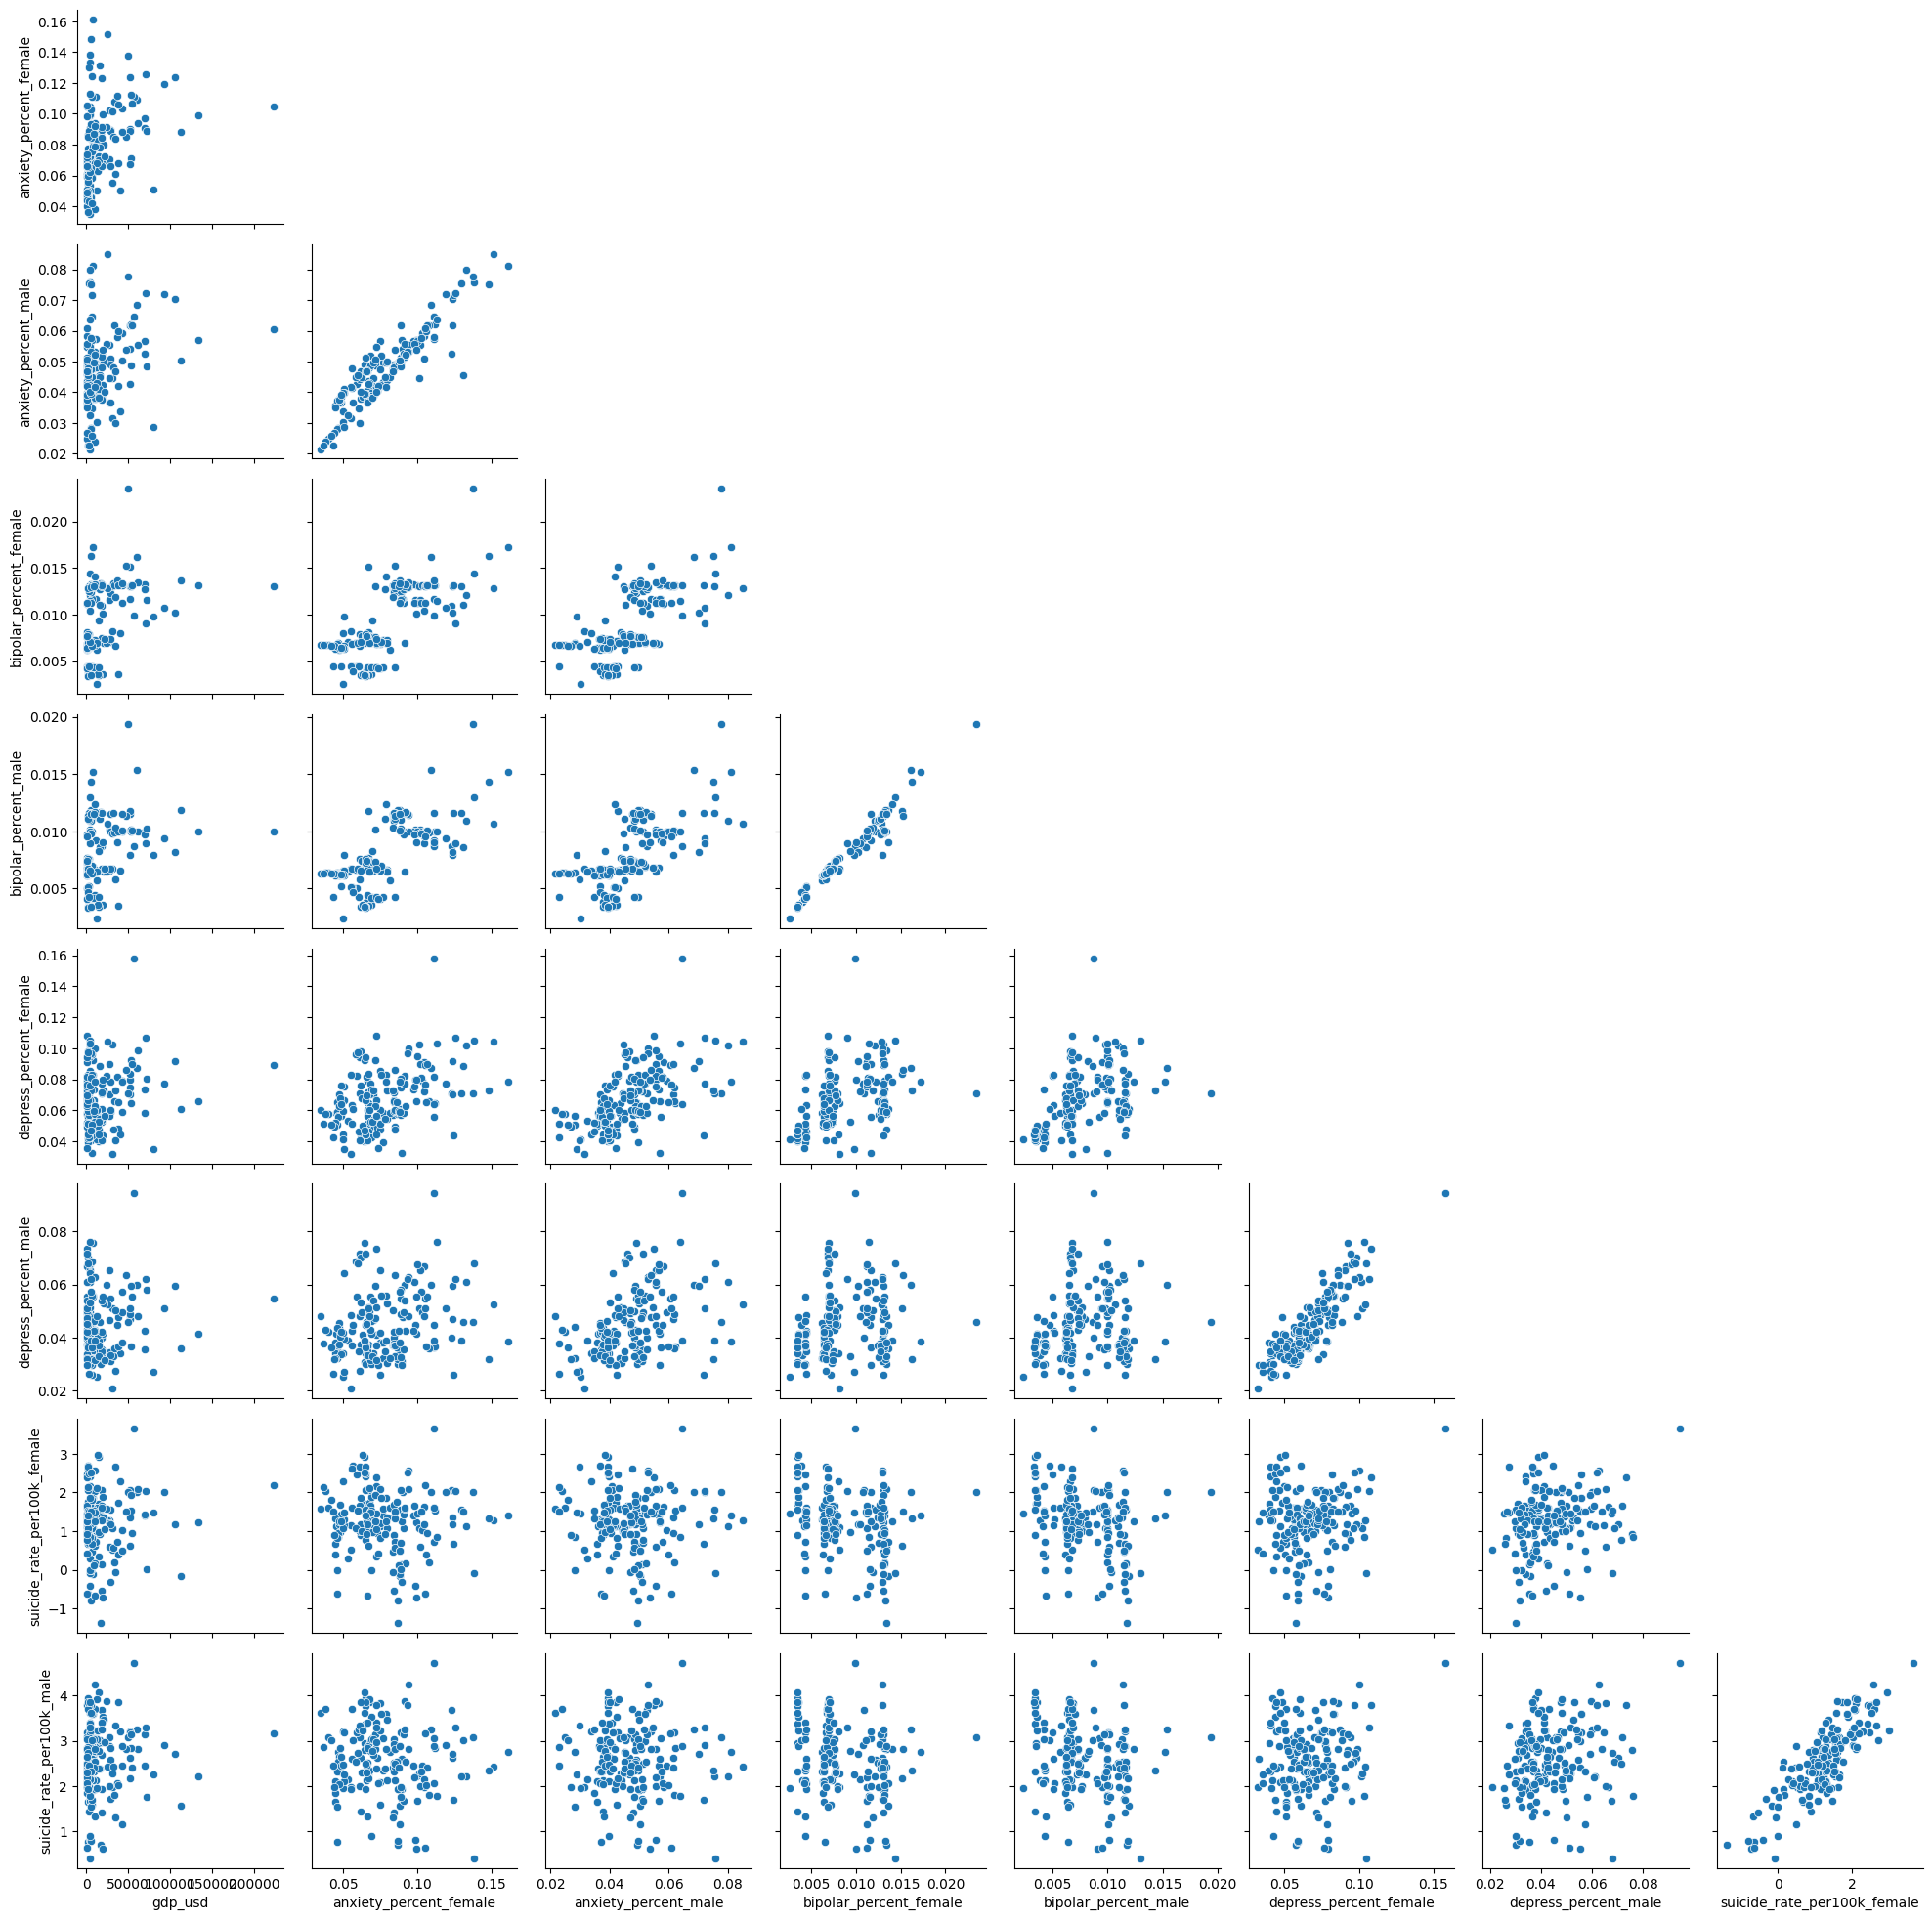

In [351]:
# Make a pairplot only below the diagonal of the grid
grid = sns.PairGrid(pivoted_log_response, corner=True)
grid.map_lower(sns.scatterplot)

# Don't plot anything on the diagonals of the pairplot
# Source for this code: https://stackoverflow.com/questions/63712608/how-to-remove-diagonal-plot-from-pairplot
for i in range(pivoted_log_response.shape[1]):
    grid.axes[i, i].set_visible(False)